In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import gpflow

2022-11-03 02:42:18.844516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 02:42:18.977034: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-03 02:42:18.983041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-03 02:42:18.983059: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

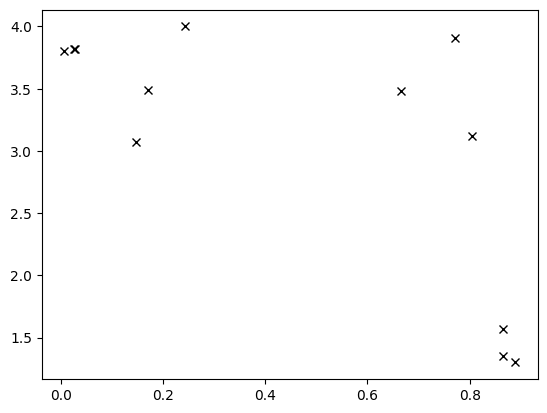

In [2]:
X = np.array(
    [
        [0.865], [0.666], [0.804], [0.771], [0.147], [0.866], [0.007], [0.026],
        [0.171], [0.889], [0.243], [0.028],
    ]
)
Y = np.array(
    [
        [1.57], [3.48], [3.12], [3.91], [3.07], [1.35], [3.80], [3.82], [3.49],
        [1.30], [4.00], [3.82],
    ]
)

plt.plot(X, Y, "kx")

In [3]:
def plot_model(model) -> None:
    X, Y = model.data
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    gpflow.utilities.print_summary(model, "notebook")

    Xplot = np.linspace(-0.4, 0.6, 200)[:, None]

    y_mean, y_var = model.predict_y(Xplot, full_cov=False)
    y_lower = y_mean - 1.96 * np.sqrt(y_var)
    y_upper = y_mean + 1.96 * np.sqrt(y_var)

    _, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(X, Y, "kx", mew=2)
    (mean_line,) = ax.plot(Xplot, y_mean, "-")
    color = mean_line.get_color()
    ax.plot(Xplot, y_lower, lw=0.1, color=color)
    ax.plot(Xplot, y_upper, lw=0.1, color=color)
    ax.fill_between(
        Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color=color, alpha=0.1
    )

    # Also plot the inducing variables if possible:
    iv = getattr(model, "inducing_variable", None)
    if iv is not None:
        ax.scatter(iv.Z, np.zeros_like(iv.Z), marker="^", color='r')

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.309081
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.181664
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0118533


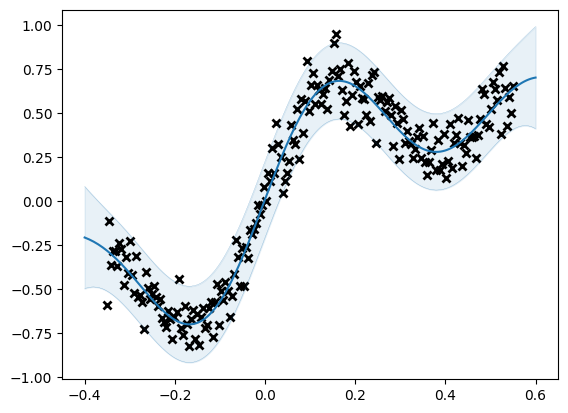

In [12]:
model = gpflow.models.GPR(
    (X, Y),
    kernel=gpflow.kernels.SquaredExponential(),
)
plot_model(model)

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.020191723630872002
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.1316095597041367
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.018004614861709293
SGPR.inducing_variable.Z,Parameter,Identity,,True,"(4, 1)",float64,[[0.12690839...


<Parameter: name=identity, dtype=float64, shape=[4, 1], fn="identity", numpy=
array([[ 0.12690839],
       [-0.25398128],
       [-0.10588553],
       [ 0.54973102]])>

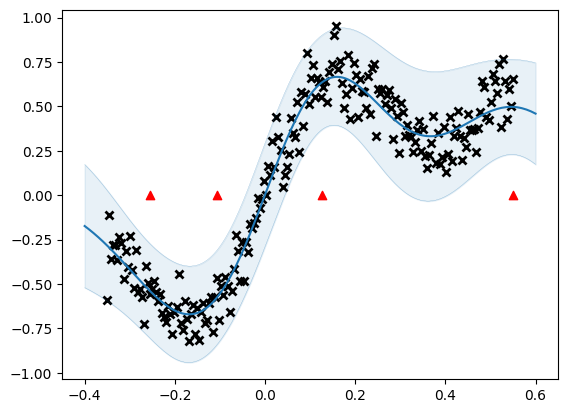

In [14]:
inducing_points = np.array([[-0.225], [-0.125], [0.3], [0.4]])
model = gpflow.models.SGPR(
    (X, Y),
    kernel=gpflow.kernels.SquaredExponential(),
    inducing_variable=inducing_points,
)
plot_model(model)
model.inducing_variable.Z

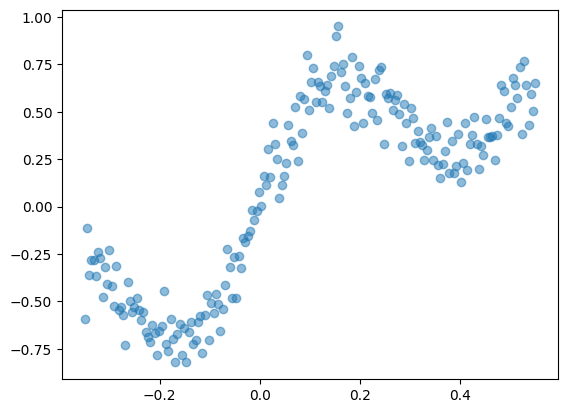

In [8]:
def generate_weightuncertainty_data():

	x = np.linspace(-0.35, 0.55, 200)
	x_noise = np.random.normal(0., 0.01, size=x.shape)
	y_noise = np.random.normal(0., 0.1, size=x.shape)

	y = x + 0.3 * np.sin(2 * np.pi * (x + x_noise)) + 0.3 * np.sin(4 * np.pi * (x + x_noise)) + y_noise

	x, y = x.reshape(-1, 1), y.reshape(-1, 1)

	mu = np.array([[-0.3,-0.3],[-0.18, -0.8],[0,0], [0.15, 0.8], [0.35,0.3], [0.55, 0.6]])

	if True:
		plt.scatter(x, y, alpha=0.5)
		#plt.scatter(mu[:,0], mu[:,1], color='red', marker='+', s=100)
		plt.show()

	return x, y

X, Y  = generate_weightuncertainty_data()

In [7]:
import argparse
params = argparse.ArgumentParser()
params.add_argument('-logging',                   type=int,           default=0)

params.add_argument('-num_samples',               type=int,           default=200)
params.add_argument('-num_inducing_points',       type=int,           default=6)
params.add_argument('-x_noise_std',               type=float,         default=0.01)
params.add_argument('-y_noise_std',               type=float,         default=0.1)
params.add_argument('-zoom',                      type=int,           default=10)

params.add_argument('-lr_kernel',                 type=float,         default=0.01)
params.add_argument('-lr_ip',                     type=float,         default=0.1)

params.add_argument('-num_epochs',                type=int,           default=300)

params = params.parse_args()

usage: ipykernel_launcher.py [-h] [-logging LOGGING]
                             [-num_samples NUM_SAMPLES]
                             [-num_inducing_points NUM_INDUCING_POINTS]
                             [-x_noise_std X_NOISE_STD]
                             [-y_noise_std Y_NOISE_STD] [-zoom ZOOM]
                             [-lr_kernel LR_KERNEL] [-lr_ip LR_IP]
                             [-num_epochs NUM_EPOCHS]
ipykernel_launcher.py: error: unrecognized arguments: -f /cluster/home/kheuto01/.local/share/jupyter/runtime/kernel-88cc4dbd-266b-4607-80c1-6027ac62fce4.json


SystemExit: 2

/cluster/tufts/hugheslab/kheuto01/miniconda3/envs/modern_zigp/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
